<a href="https://www.kaggle.com/code/lalit7881/smart-focus-prediction-using-machine-learning?scriptVersionId=297444128" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/background-noise-and-focus-dataset/background_noise_focus_dataset.csv


## Title:
Background Noise & Focus Dataset

## Description:
The Background Noise & Focus Dataset is designed to analyze how different types of ambient sounds influence human concentration, productivity, and cognitive performance. This dataset includes categorized audio samples such as white noise, café ambience, office chatter, nature sounds, traffic noise, instrumental music, and silence-based controls.

Each record is structured with features including noise type, decibel level, duration of exposure, task type (e.g., reading, coding, problem-solving), participant response time, accuracy score, and self-reported focus rating. Additional metadata such as age group, work environment, and time of day may also be included for deeper behavioral insights.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/background-noise-and-focus-dataset/background_noise_focus_dataset.csv")

In [3]:
df.head()

,participant_id,age,role,task_type,background_noise_type,noise_volume_level,focus_duration_minutes,perceived_focus_score,task_completion_quality,mental_fatigue_after_task
0,1,44,Student,Writing,Traffic Noise,8,98,5,5,1
1,2,30,Student,Writing,Silence,9,31,3,9,7
2,3,23,Remote Worker,Reading,Silence,4,39,9,1,10
3,4,36,Professional,Writing,Songs with Lyrics,1,93,4,4,10
4,5,34,Remote Worker,Studying,Traffic Noise,1,94,6,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   participant_id             500 non-null    int64 
 1   age                        500 non-null    int64 
 2   role                       500 non-null    object
 3   task_type                  500 non-null    object
 4   background_noise_type      500 non-null    object
 5   noise_volume_level         500 non-null    int64 
 6   focus_duration_minutes     500 non-null    int64 
 7   perceived_focus_score      500 non-null    int64 
 8   task_completion_quality    500 non-null    int64 
 9   mental_fatigue_after_task  500 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 39.2+ KB


In [5]:
df.describe()

,participant_id,age,noise_volume_level,focus_duration_minutes,perceived_focus_score,task_completion_quality,mental_fatigue_after_task
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,32.988000,5.440000,63.898000,5.254000,5.59400,5.374000
std,144.481833,9.960637,2.848619,33.004214,2.820886,2.82154,2.992664
min,1.000000,16.000000,1.000000,10.000000,1.000000,1.00000,1.000000
25%,125.750000,24.000000,3.000000,33.750000,3.000000,3.00000,3.000000
50%,250.500000,34.000000,5.000000,63.500000,5.000000,6.00000,5.000000
75%,375.250000,41.000000,8.000000,94.000000,8.000000,8.00000,8.000000
max,500.000000,49.000000,10.000000,120.000000,10.000000,10.00000,10.000000


In [6]:
df.dtypes

participant_id                int64
age                           int64
role                         object
task_type                    object
background_noise_type        object
noise_volume_level            int64
focus_duration_minutes        int64
perceived_focus_score         int64
task_completion_quality       int64
mental_fatigue_after_task     int64
dtype: object

In [7]:
df.isnull().sum()

participant_id               0
age                          0
role                         0
task_type                    0
background_noise_type        0
noise_volume_level           0
focus_duration_minutes       0
perceived_focus_score        0
task_completion_quality      0
mental_fatigue_after_task    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['participant_id', 'age', 'role', 'task_type', 'background_noise_type',
       'noise_volume_level', 'focus_duration_minutes', 'perceived_focus_score',
       'task_completion_quality', 'mental_fatigue_after_task'],
      dtype='object')

## Feature engg

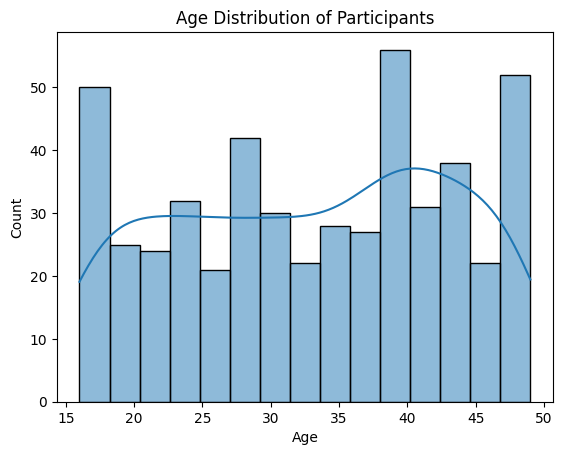

In [10]:
plt.figure()
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


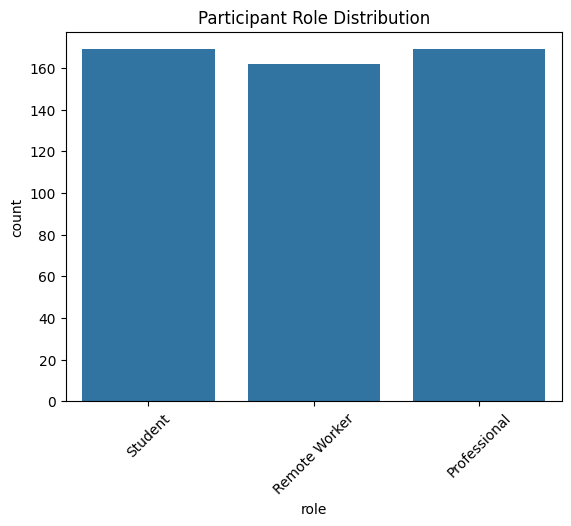

In [11]:
plt.figure()
sns.countplot(x='role', data=df)
plt.title("Participant Role Distribution")
plt.xticks(rotation=45)
plt.show()


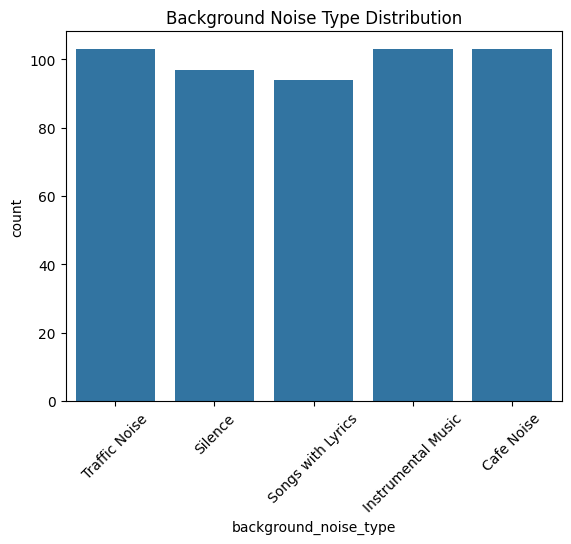

In [12]:
plt.figure()
sns.countplot(x='background_noise_type', data=df)
plt.title("Background Noise Type Distribution")
plt.xticks(rotation=45)
plt.show()


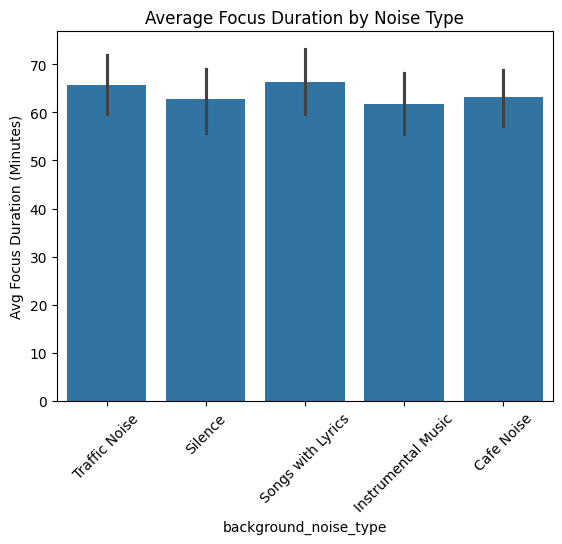

In [13]:
plt.figure()
sns.barplot(x='background_noise_type',
            y='focus_duration_minutes',
            data=df,
            estimator='mean')
plt.title("Average Focus Duration by Noise Type")
plt.xticks(rotation=45)
plt.ylabel("Avg Focus Duration (Minutes)")
plt.show()


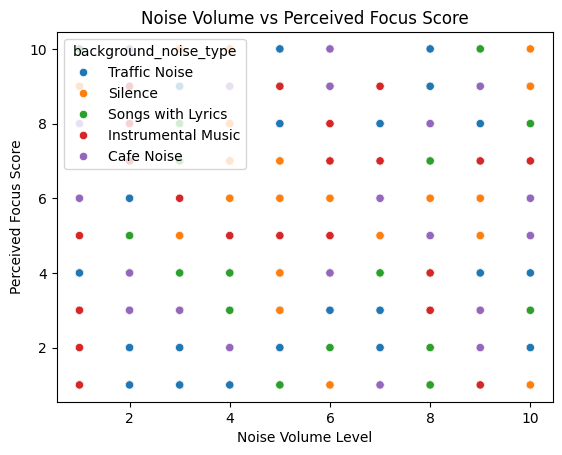

In [14]:
plt.figure()
sns.scatterplot(x='noise_volume_level',
                y='perceived_focus_score',
                hue='background_noise_type',
                data=df)
plt.title("Noise Volume vs Perceived Focus Score")
plt.xlabel("Noise Volume Level")
plt.ylabel("Perceived Focus Score")
plt.show()


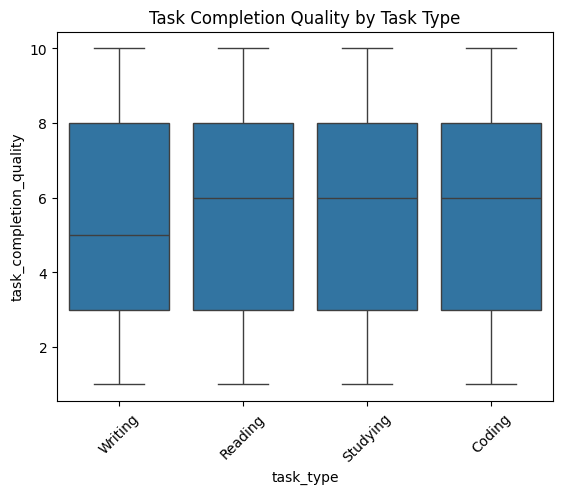

In [15]:
plt.figure()
sns.boxplot(x='task_type',
            y='task_completion_quality',
            data=df)
plt.title("Task Completion Quality by Task Type")
plt.xticks(rotation=45)
plt.show()


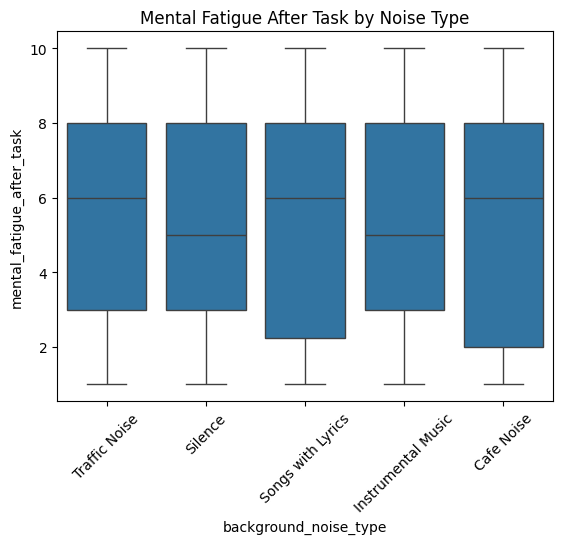

In [16]:
plt.figure()
sns.boxplot(x='background_noise_type',
            y='mental_fatigue_after_task',
            data=df)
plt.title("Mental Fatigue After Task by Noise Type")
plt.xticks(rotation=45)
plt.show()


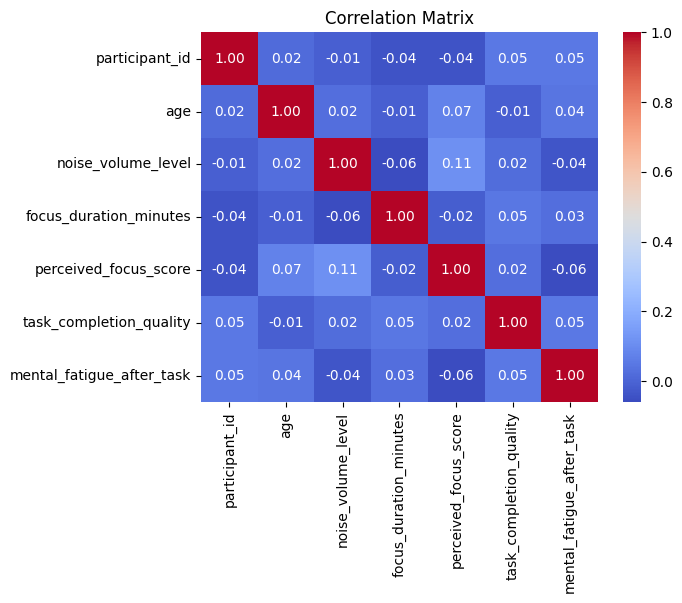

In [17]:
plt.figure()
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Correlation Matrix")
plt.show()


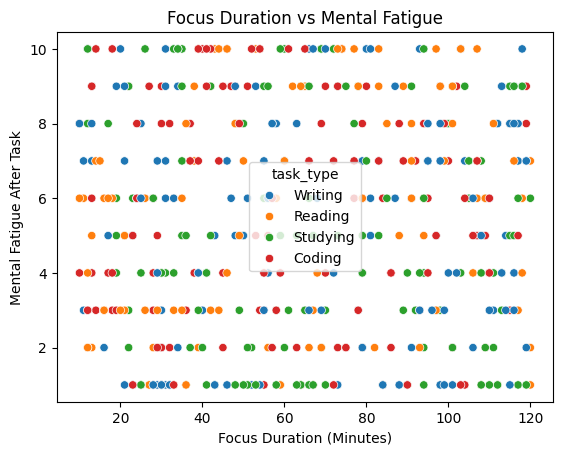

In [18]:
plt.figure()
sns.scatterplot(x='focus_duration_minutes',
                y='mental_fatigue_after_task',
                hue='task_type',
                data=df)
plt.title("Focus Duration vs Mental Fatigue")
plt.xlabel("Focus Duration (Minutes)")
plt.ylabel("Mental Fatigue After Task")
plt.show()


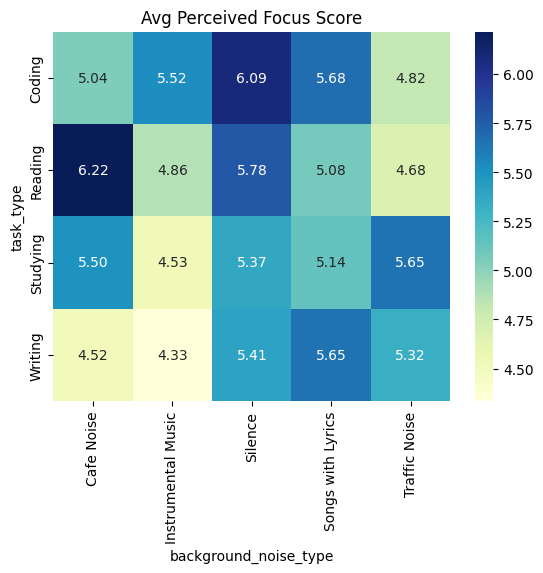

In [19]:
pivot_table = df.pivot_table(
    values='perceived_focus_score',
    index='task_type',
    columns='background_noise_type',
    aggfunc='mean'
)

plt.figure()
sns.heatmap(pivot_table,
            annot=True,
            cmap='YlGnBu',
            fmt=".2f")

plt.title("Avg Perceived Focus Score")
plt.show()


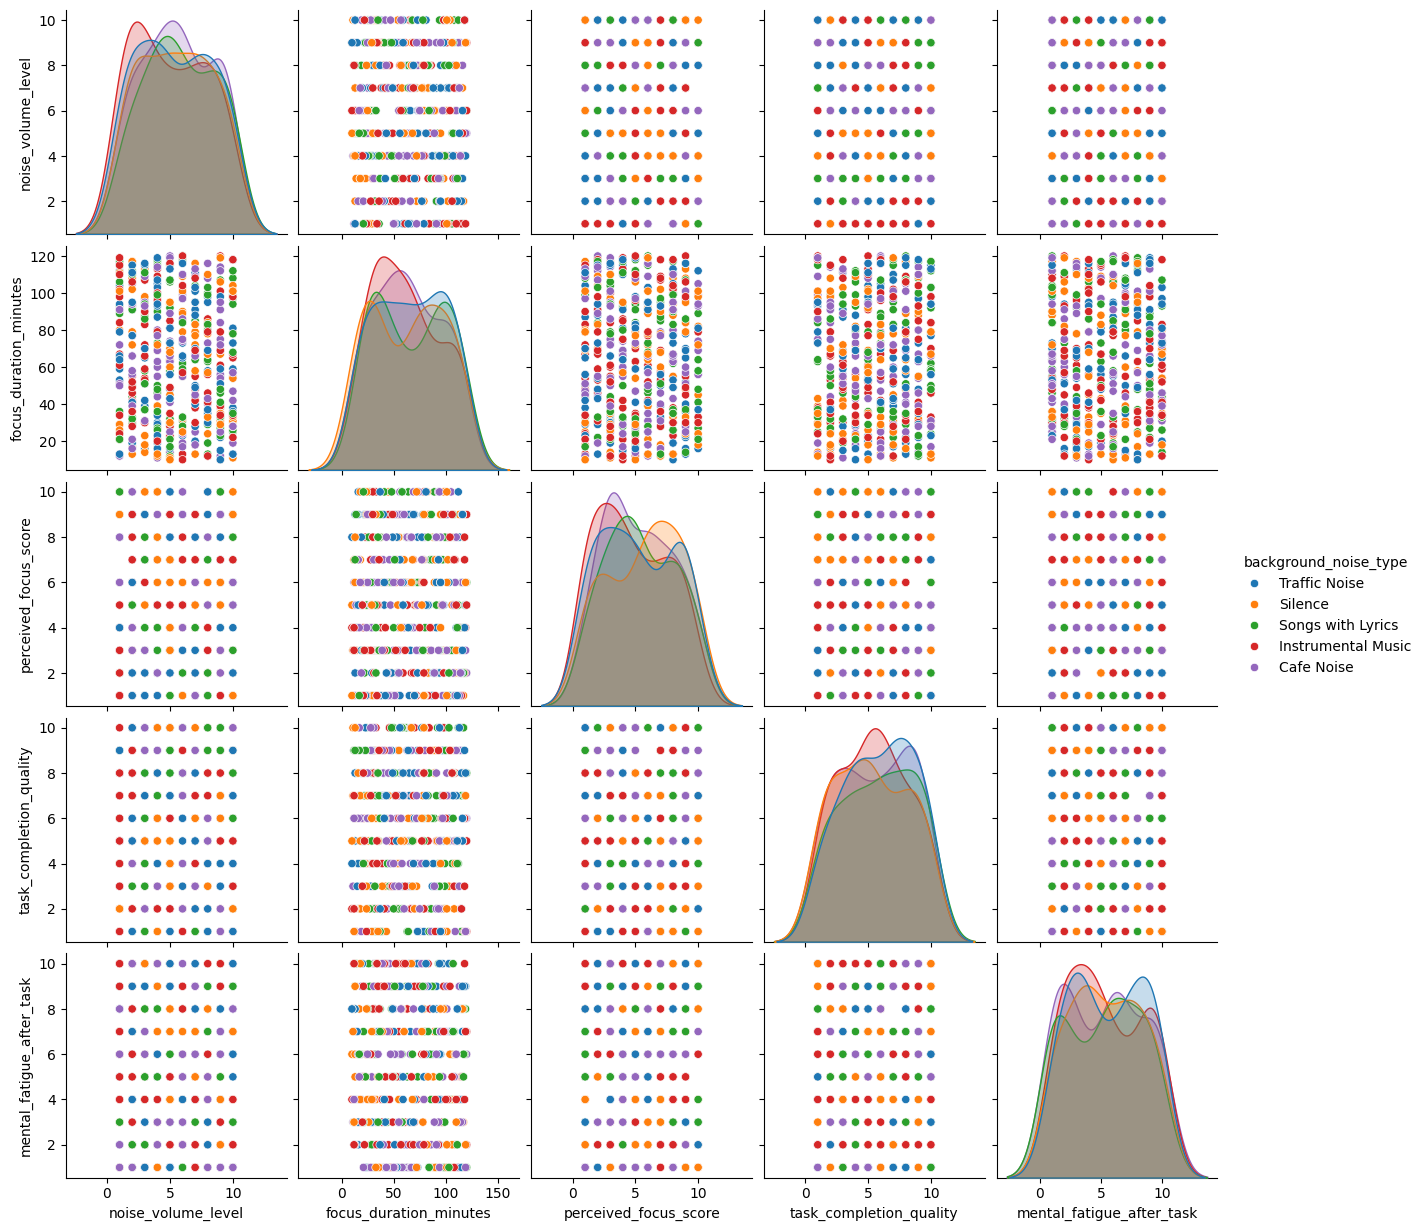

In [20]:
sns.pairplot(df,
             vars=['noise_volume_level',
                   'focus_duration_minutes',
                   'perceived_focus_score',
                   'task_completion_quality',
                   'mental_fatigue_after_task'],
             hue='background_noise_type')
plt.show()


## Prepare data for machine learning

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [22]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (500, 10)
   participant_id  age           role task_type background_noise_type  \
0               1   44        Student   Writing         Traffic Noise   
1               2   30        Student   Writing               Silence   
2               3   23  Remote Worker   Reading               Silence   
3               4   36   Professional   Writing     Songs with Lyrics   
4               5   34  Remote Worker  Studying         Traffic Noise   

   noise_volume_level  focus_duration_minutes  perceived_focus_score  \
0                   8                      98                      5   
1                   9                      31                      3   
2                   4                      39                      9   
3                   1                      93                      4   
4                   1                      94                      6   

   task_completion_quality  mental_fatigue_after_task  
0                        5                     

In [23]:
df = df.drop(columns=['participant_id'])

# Handle missing values
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [24]:
X = df.drop(columns=['perceived_focus_score'])
y = df['perceived_focus_score']

categorical_cols = ['role', 'task_type', 'background_noise_type']
numeric_cols = X.drop(columns=categorical_cols).columns

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [28]:
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)


In [29]:
def evaluate_model(y_test, y_pred, title="Model Performance"):
    print("\n", title)
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))

evaluate_model(y_test, y_pred, "Random Forest Initial Performance")



 Random Forest Initial Performance
MAE : 2.2806
MSE : 7.391114
RMSE: 2.7186603318546436
R2  : -0.1768540220368131


In [30]:
cv_scores = cross_val_score(
    rf_pipeline, X, y, cv=5, scoring='r2'
)

print("\nCross Validation R2 Scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


Cross Validation R2 Scores: [-0.09369452 -0.17933351 -0.12957462 -0.18771498 -0.08353488]
Average CV R2: -0.13477050230091478


In [31]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

evaluate_model(y_test, y_pred_best, "Random Forest After Tuning")



Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}

 Random Forest After Tuning
MAE : 2.281344052336552
MSE : 7.4192170554520285
RMSE: 2.7238239765910035
R2  : -0.18132874585249814


In [32]:
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

all_features = list(numeric_cols) + list(encoded_cat_features)

importances = best_model.named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Important Features:")
print(feature_importance_df.head())



Top Important Features:
                     Feature  Importance
2     focus_duration_minutes    0.240583
0                        age    0.169331
1         noise_volume_level    0.135798
3    task_completion_quality    0.116709
4  mental_fatigue_after_task    0.114334


## Thank you..pls upvote!!!